In [1]:
#from mpl_toolkits.mplot3d import Axes3D
# from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt # plotting
import numpy as np # linear algebra
import os # accessing directory structure
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

In [2]:
for dirname, _, filenames in os.walk('/home/edmondium/power-consumption'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

/home/edmondium/power-consumption/LSTM.sh
/home/edmondium/power-consumption/README.md
/home/edmondium/power-consumption/.gitattributes
/home/edmondium/power-consumption/appliances.png
/home/edmondium/power-consumption/valid.csv
/home/edmondium/power-consumption/test.csv
/home/edmondium/power-consumption/e2e_processed_h2_appliance.ipynb
/home/edmondium/power-consumption/train.csv
/home/edmondium/power-consumption/e2e_processed_h2_appliance.csv
/home/edmondium/power-consumption/results/edmondium/graph.pbtxt
/home/edmondium/power-consumption/results/edmondium/checkpoint
/home/edmondium/power-consumption/results/edmondium/events.out.tfevents.1686503471.LAPTOP-1Q9H40K6
/home/edmondium/power-consumption/results/edmondium/events.out.tfevents.1686504111.LAPTOP-1Q9H40K6
/home/edmondium/power-consumption/results/edmondium/events.out.tfevents.1686503859.LAPTOP-1Q9H40K6
/home/edmondium/power-consumption/results/edmondium/model.ckpt-0.data-00000-of-00001
/home/edmondium/power-consumption/results/ed

In [3]:
# Distribution graphs (histogram/bar graph) of column data
def plotPerColumnDistribution(df, nGraphShown, nGraphPerRow):
    nunique = df.nunique()
    # df = df[[col for col in df if nunique[col] > 1 and nunique[col] < 50]] # For displaying purposes, pick columns that have between 1 and 50 unique values
    df = df[[col for col in df if nunique[col] > 1 and nunique[col] < 100]]
    nRow, nCol = df.shape
    columnNames = list(df)
    nGraphRow = (nCol + nGraphPerRow - 1) / nGraphPerRow
    plt.figure(num = None, figsize = (6 * nGraphPerRow, 8 * nGraphRow), dpi = 80, facecolor = 'w', edgecolor = 'k')
    for i in range(min(nCol, nGraphShown)):
        # plt.subplot(nGraphRow, nGraphPerRow, i + 1)
        plt.subplot(int(nGraphRow), nGraphPerRow, i + 1)
        columnDf = df.iloc[:, i]
        if (not np.issubdtype(type(columnDf.iloc[0]), np.number)):
            valueCounts = columnDf.value_counts()
            valueCounts.plot.bar()
        else:
            columnDf.hist()
        # plt.ylabel('counts')
        plt.ylabel('counts', rotation = 0)
        plt.xlabel('watts')
        # plt.xticks(rotation = 90)
        plt.xticks(rotation = 0)
        plt.title(f'{columnNames[i]} (column {i})')
    plt.tight_layout(pad = 1.0, w_pad = 1.0, h_pad = 1.0)
    plt.show()

In [4]:
# Correlation matrix
def plotCorrelationMatrix(df, graphWidth):
    filename = df.dataframeName
    # df = df.dropna('columns') # drop columns with NaN
    df = df.dropna() # drop columns with NaN
    df = df[[col for col in df if df[col].nunique() > 1]] # keep columns where there are more than 1 unique values
    if df.shape[1] < 2:
        print(f'No correlation plots shown: The number of non-NaN or constant columns ({df.shape[1]}) is less than 2')
        return
    corr = df.corr()
    plt.figure(num=None, figsize=(graphWidth, graphWidth), dpi=80, facecolor='w', edgecolor='k')
    corrMat = plt.matshow(corr, fignum = 1)
    plt.xticks(range(len(corr.columns)), corr.columns, rotation=90)
    plt.yticks(range(len(corr.columns)), corr.columns)
    plt.gca().xaxis.tick_bottom()
    plt.colorbar(corrMat)
    plt.title(f'Correlation Matrix for {filename}', fontsize=15)
    plt.show()

In [5]:
# Scatter and density plots
def plotScatterMatrix(df, plotSize, textSize):
    df = df.select_dtypes(include =[np.number]) # keep only numerical columns
    # Remove rows and columns that would lead to df being singular
    # df = df.dropna('columns')
    df = df[[col for col in df if df[col].nunique() > 1]] # keep columns where there are more than 1 unique values
    columnNames = list(df)
    if len(columnNames) > 10: # reduce the number of columns for matrix inversion of kernel density plots
        columnNames = columnNames[:10]
    df = df[columnNames]
    print(df)
    ax = pd.plotting.scatter_matrix(df, alpha=0.75, figsize=[plotSize, plotSize], diagonal='kde')
    corrs = df.corr().values
    for i, j in zip(*plt.np.triu_indices_from(ax, k = 1)):
        # ax[i, j].annotate('Corr. coef = %.3f' % corrs[i, j], (0.8, 0.2), xycoords='axes fraction', ha='center', va='center', size=textSize)
        ax[i, j].annotate('Corr. coef = %.3f' % corrs[i, j], (0.8, 0.2), xycoords='axes fraction', ha='right', va='center', size=textSize)
    plt.suptitle('Scatter and Density Plot')
    plt.show()

In [6]:
nRowsRead = 5000000 # specify 'None' if want to read whole file
# nRowsRead = None
# e2e_demo_processed_h2_appliance.csv may have more rows in reality, but we are only loading/previewing the first 1000 rows
# df1 = pd.read_csv('/home/edmondium/e2e_processed_h2_appliance.csv', delimiter=',', nrows = nRowsRead)
df1 = pd.read_csv('/home/edmondium/power-consumption/e2e_processed_h2_appliance.csv', delimiter=',', nrows = nRowsRead, index_col=0, parse_dates=True)
df1.dataframeName = 'e2e_processed_h2_appliance.csv'
nRow, nCol = df1.shape
print(f'There are {nRow} rows and {nCol} columns')

There are 5000000 rows and 19 columns


In [7]:
df1.head(5)

,modem,cooker,rice_cooker,kettle,aggregate,monitor,laptop,router,server_hdd,server,speakers,playstation,toaster,fridge,microwave,laptop2,running_machine,washing_machine,dish_washer
time,,,,,,,,,,,,,,,,,,,
2013-02-17 23:39:19,NaN,NaN,NaN,NaN,NaN,62.0,14.0,NaN,NaN,21.0,3.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2013-02-17 23:39:25,NaN,NaN,NaN,NaN,NaN,61.0,14.0,NaN,NaN,21.0,3.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2013-02-17 23:39:31,NaN,NaN,NaN,NaN,NaN,62.0,14.0,NaN,NaN,21.0,3.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2013-02-17 23:39:37,NaN,NaN,NaN,NaN,NaN,62.0,14.0,NaN,NaN,22.0,3.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2013-02-17 23:39:43,NaN,NaN,NaN,NaN,NaN,62.0,14.0,NaN,NaN,22.0,3.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


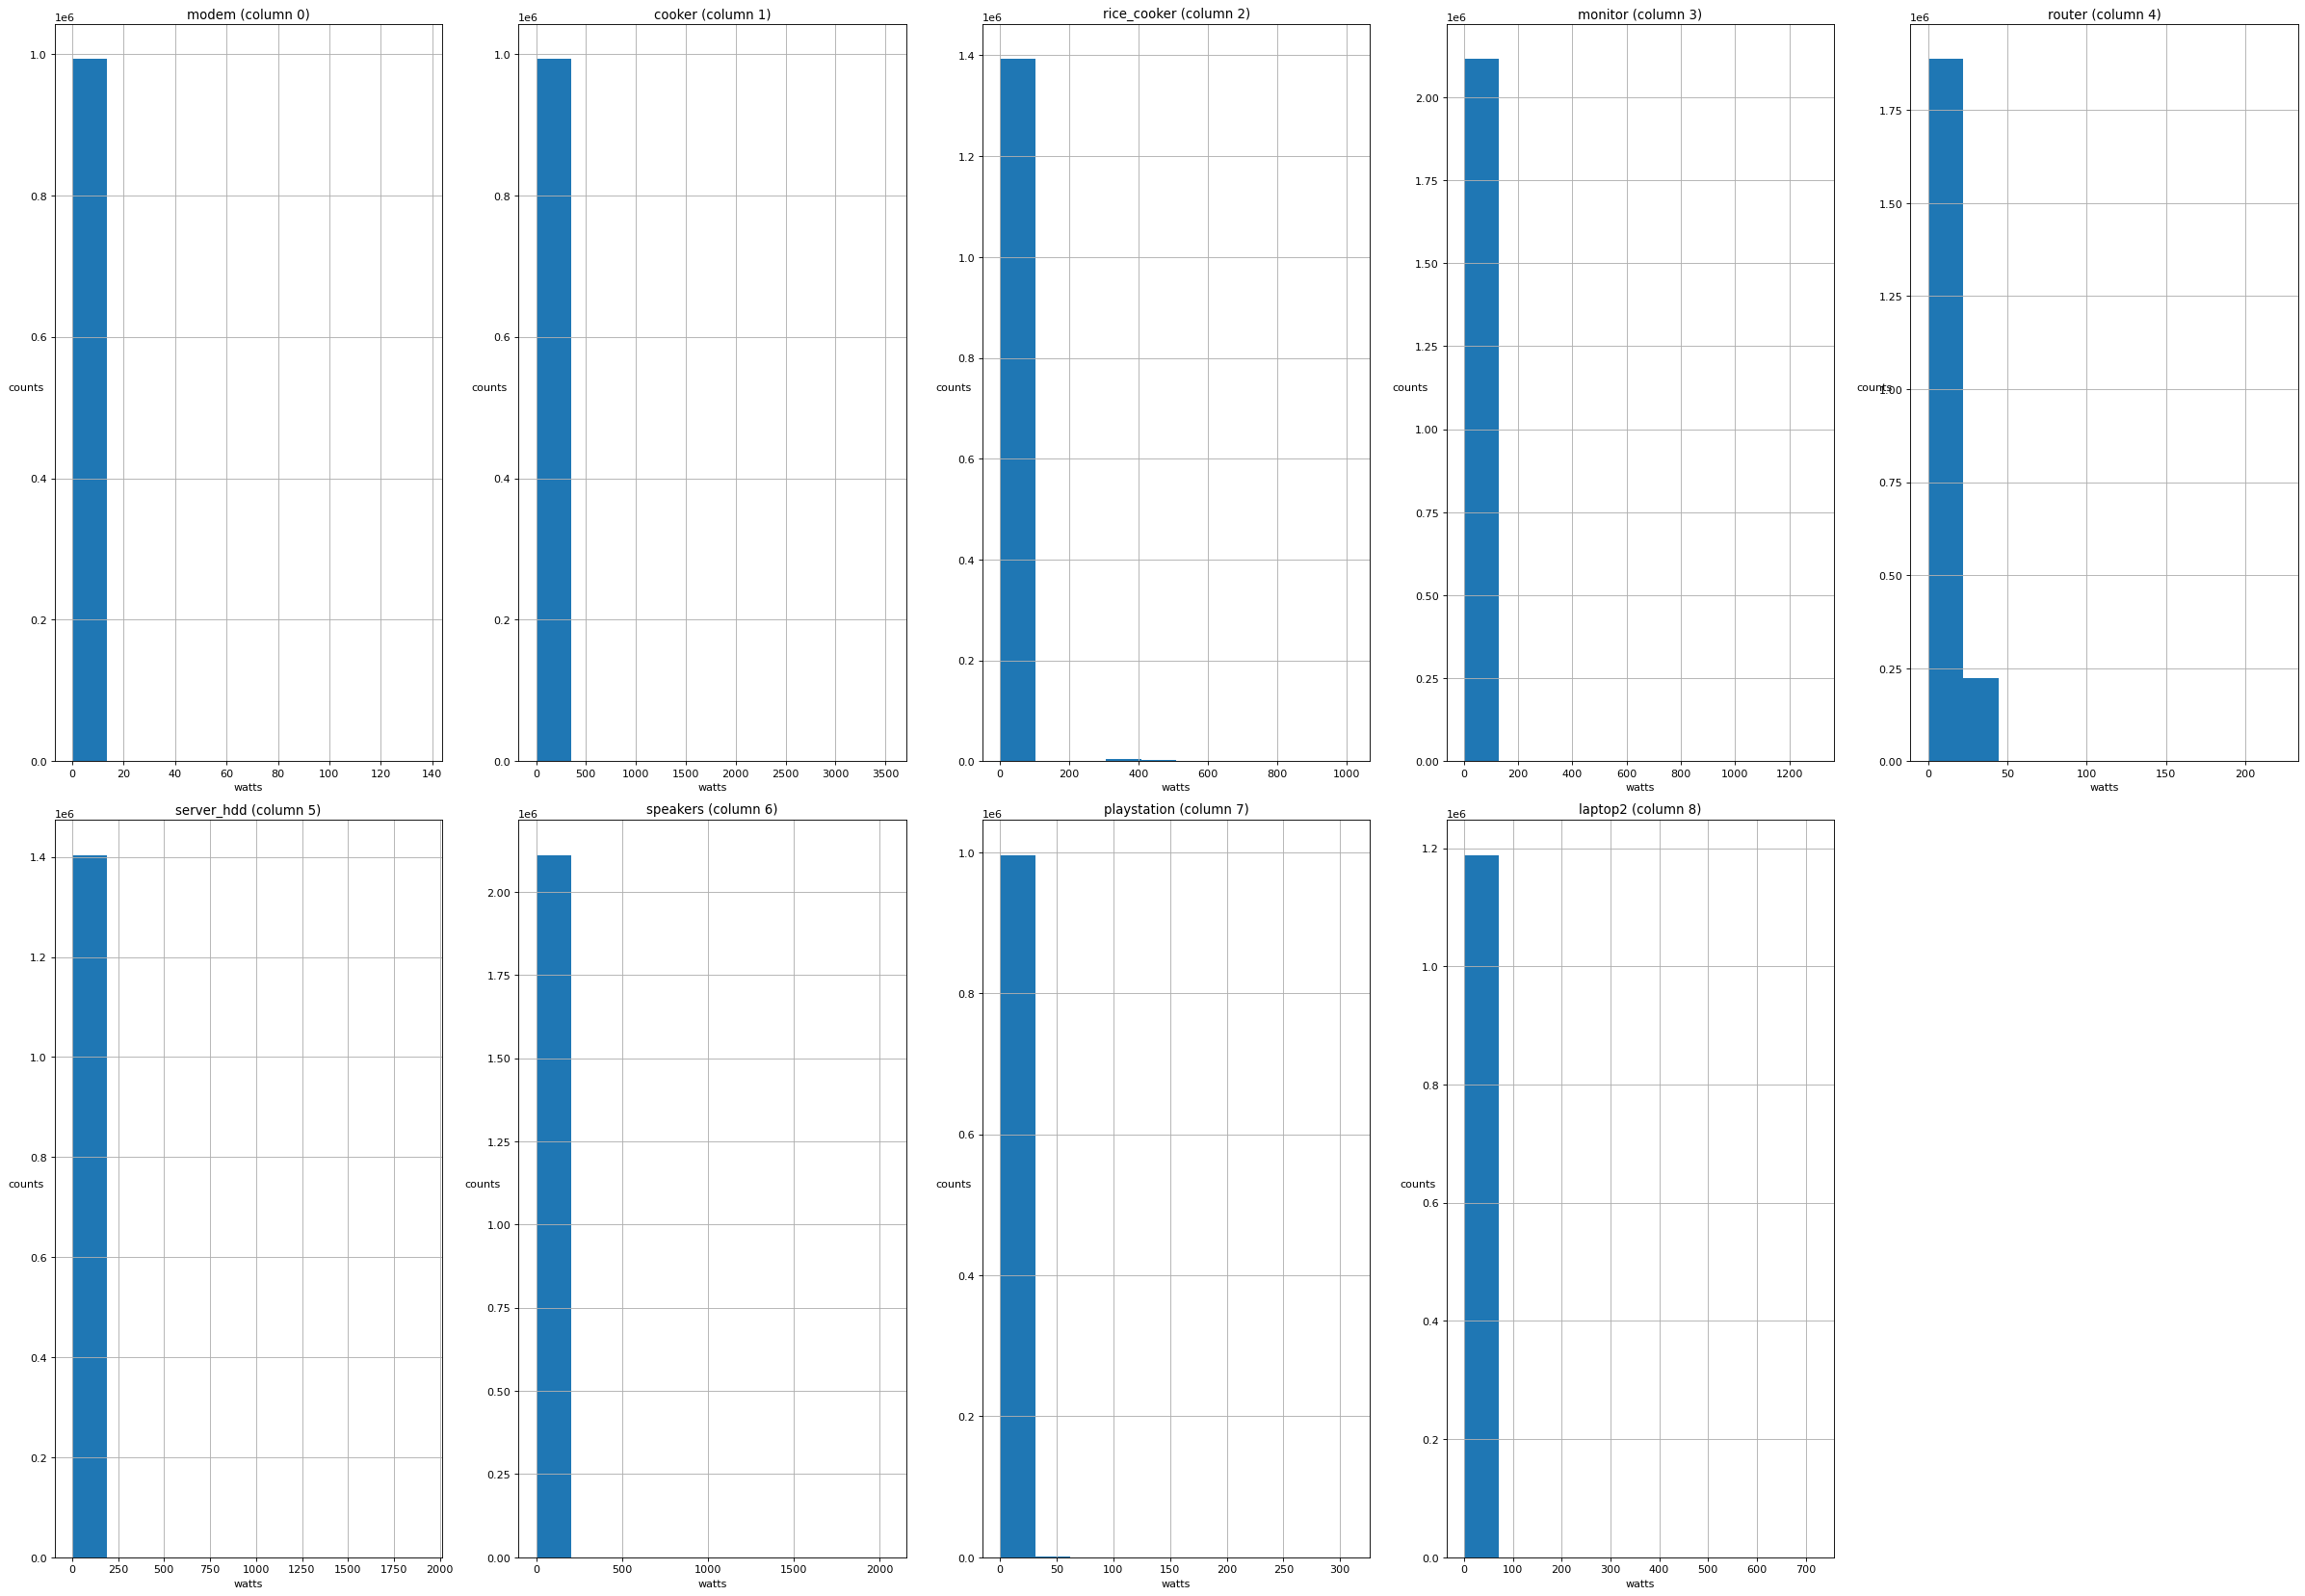

In [8]:
plotPerColumnDistribution(df1, 10, 5)
# plotPerColumnDistribution(df1, 10, 1)

In [9]:
plotCorrelationMatrix(df1, 8)

No correlation plots shown: The number of non-NaN or constant columns (0) is less than 2


         modem  cooker  rice_cooker  kettle  aggregate  monitor  laptop  \
0          NaN     NaN          NaN     NaN        NaN     62.0    14.0   
1          NaN     NaN          NaN     NaN        NaN     61.0    14.0   
2          NaN     NaN          NaN     NaN        NaN     62.0    14.0   
3          NaN     NaN          NaN     NaN        NaN     62.0    14.0   
4          NaN     NaN          NaN     NaN        NaN     62.0    14.0   
...        ...     ...          ...     ...        ...      ...     ...   
2999995    9.0     0.0          1.0     NaN        NaN      0.0     NaN   
2999996    NaN     NaN          NaN     1.0      238.0      NaN     0.0   
2999997    9.0     0.0          1.0     NaN        NaN      0.0     NaN   
2999998    NaN     NaN          NaN     NaN        NaN      NaN     NaN   
2999999    NaN     NaN          NaN     1.0      239.0      NaN     0.0   

         router  server_hdd  server  
0           NaN         NaN    21.0  
1           NaN        

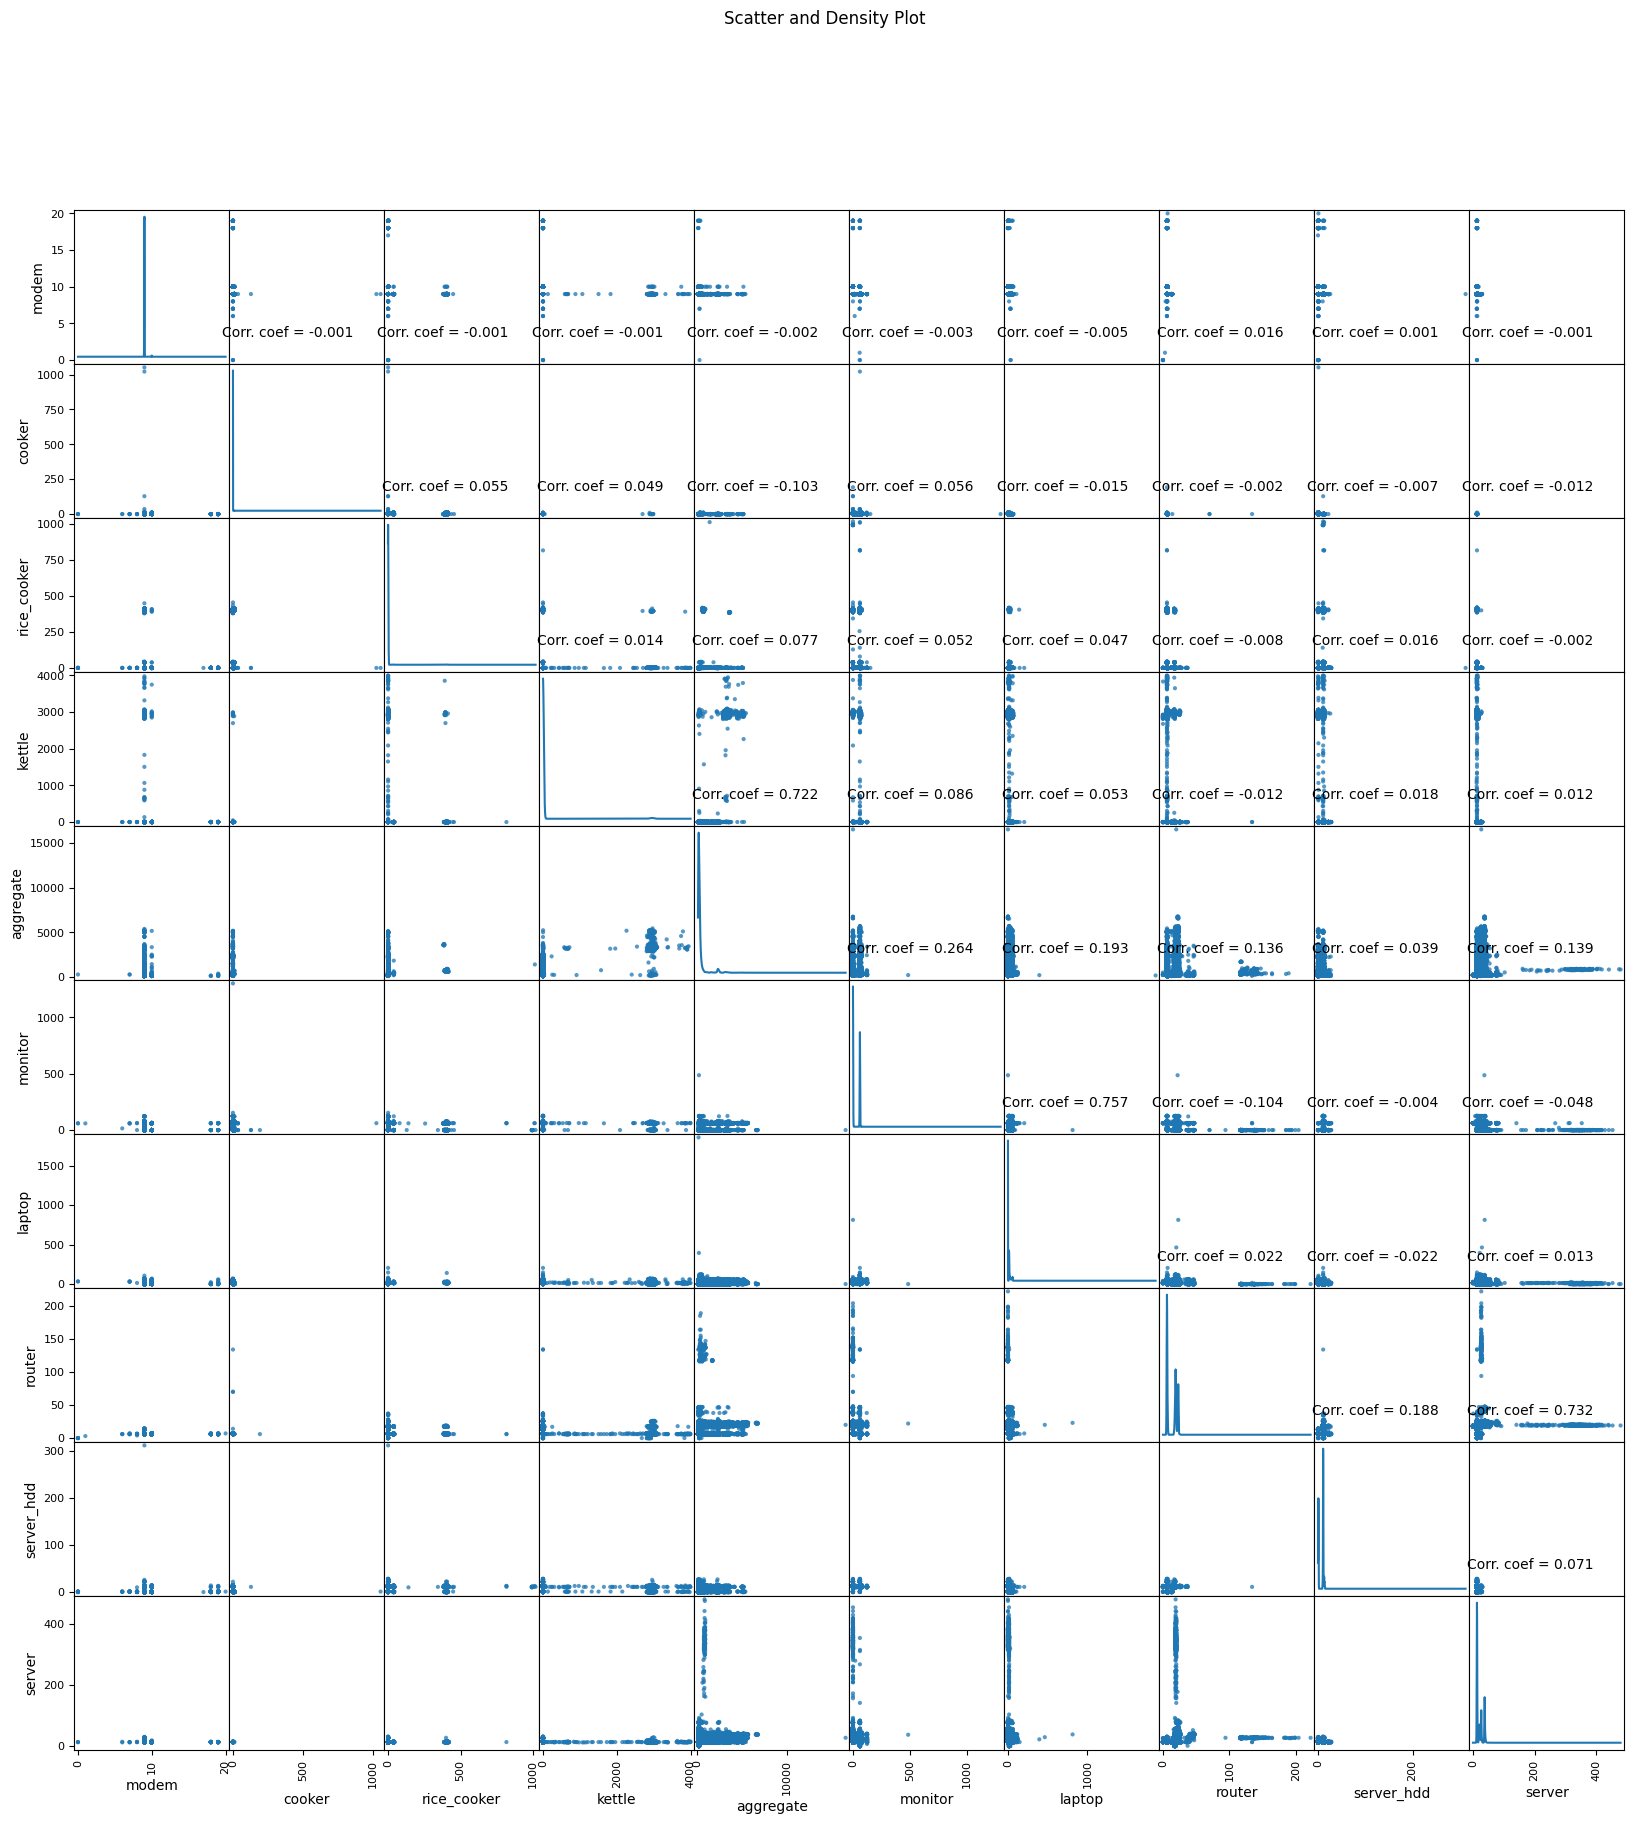

In [10]:
plotScatterMatrix(df1, 20, 10)
# plotScatterMatrix(df1, 30, 20)

In [10]:
# If raw data is used, please make sure raw_data_dir is correctly set 
use_raw = False #@param

selected_hid = 2 #@param
# raw_data_dir = 'ukdale data directory' #@param
# selected_house_dir = os.path.join(raw_data_dir, 'house_{}'.format(selected_hid))

In [11]:
df1.describe()

,modem,cooker,rice_cooker,kettle,aggregate,monitor,laptop,router,server_hdd,server,speakers,playstation,toaster,fridge,microwave,laptop2,running_machine,washing_machine,dish_washer
count,993215.000000,992661.000000,1.399141e+06,1.403685e+06,2.093672e+06,2.114819e+06,2.113863e+06,2.110926e+06,1.403718e+06,2.115165e+06,2.110340e+06,996453.000000,994474.000000,996643.000000,995964.000000,1.188329e+06,1.398516e+06,995443.000000,996489.000000
mean,9.015523,0.176473,2.965452e+00,2.972475e+01,3.422124e+02,2.329411e+01,9.822314e+00,1.119666e+01,4.063280e+00,1.883311e+01,5.590003e+00,0.902529,0.655557,46.492964,7.077882,3.767220e+00,3.407389e+00,11.399909,41.693994
std,0.439602,4.798292,2.760686e+01,2.901573e+02,4.923701e+02,2.966537e+01,1.433113e+01,7.202759e+00,5.086826e+00,9.855414e+00,3.855668e+00,1.075707,18.983827,45.357107,93.566262,9.426711e+00,1.857689e+01,121.925667,279.399128
min,0.000000,0.000000,0.000000e+00,0.000000e+00,1.090000e+02,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,0.000000,7.000000,0.000000,0.000000e+00,0.000000e+00,0.000000,0.000000
25%,9.000000,0.000000,1.000000e+00,1.000000e+00,1.730000e+02,0.000000e+00,0.000000e+00,6.000000e+00,1.000000e+00,1.300000e+01,3.000000e+00,1.000000,0.000000,10.000000,0.000000,0.000000e+00,1.000000e+00,3.000000,1.000000
50%,9.000000,0.000000,1.000000e+00,1.000000e+00,2.170000e+02,0.000000e+00,0.000000e+00,6.000000e+00,1.000000e+00,1.400000e+01,3.000000e+00,1.000000,0.000000,11.000000,0.000000,0.000000e+00,1.000000e+00,3.000000,1.000000
75%,9.000000,0.000000,1.000000e+00,1.000000e+00,3.050000e+02,6.100000e+01,1.500000e+01,1.900000e+01,1.100000e+01,2.200000e+01,1.000000e+01,1.000000,1.000000,86.000000,0.000000,0.000000e+00,1.000000e+00,4.000000,1.000000
max,137.000000,3532.000000,1.017000e+03,3.996000e+03,1.652900e+04,1.300000e+03,2.100000e+03,2.220000e+02,1.917000e+03,4.790000e+02,2.051000e+03,311.000000,2364.000000,1820.000000,2668.000000,7.220000e+02,7.180000e+02,2974.000000,3964.000000


In [12]:
df1.index.min(), df1.index.max()

(Timestamp('2013-02-17 23:39:19'), Timestamp('2013-07-31 03:27:25'))

In [13]:
# cutoff_st = '2013-06-01 00:00:00'
# cutoff_et = '2013-09-30 23:59:59'
cutoff_st = '2013-03-01 00:00:00'
cutoff_et = '2013-07-31 23:59:59'
df1 = df1.loc[cutoff_st:cutoff_et]
print('{}, {}'.format(df1.index.min(), df1.index.max()))
df1.describe()

2013-03-01 00:00:05, 2013-07-31 03:27:25


,modem,cooker,rice_cooker,kettle,aggregate,monitor,laptop,router,server_hdd,server,speakers,playstation,toaster,fridge,microwave,laptop2,running_machine,washing_machine,dish_washer
count,993215.000000,992661.000000,1.399141e+06,1.403677e+06,1.941300e+06,1.961494e+06,1.960516e+06,1.957800e+06,1.403718e+06,1.961824e+06,1.957023e+06,996453.000000,994474.000000,996643.000000,995964.000000,1.188329e+06,1.398516e+06,995443.000000,996489.000000
mean,9.015523,0.176473,2.965452e+00,2.972492e+01,3.363999e+02,2.254693e+01,9.238662e+00,1.059140e+01,4.063280e+00,1.867740e+01,5.468450e+00,0.902529,0.655557,46.492964,7.077882,3.767220e+00,3.407389e+00,11.399909,41.693994
std,0.439602,4.798292,2.760686e+01,2.901581e+02,4.882763e+02,2.946968e+01,1.360037e+01,7.128248e+00,5.086826e+00,1.020258e+01,3.836008e+00,1.075707,18.983827,45.357107,93.566262,9.426711e+00,1.857689e+01,121.925667,279.399128
min,0.000000,0.000000,0.000000e+00,0.000000e+00,1.090000e+02,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,0.000000,7.000000,0.000000,0.000000e+00,0.000000e+00,0.000000,0.000000
25%,9.000000,0.000000,1.000000e+00,1.000000e+00,1.710000e+02,0.000000e+00,0.000000e+00,6.000000e+00,1.000000e+00,1.300000e+01,3.000000e+00,1.000000,0.000000,10.000000,0.000000,0.000000e+00,1.000000e+00,3.000000,1.000000
50%,9.000000,0.000000,1.000000e+00,1.000000e+00,2.130000e+02,0.000000e+00,0.000000e+00,6.000000e+00,1.000000e+00,1.400000e+01,3.000000e+00,1.000000,0.000000,11.000000,0.000000,0.000000e+00,1.000000e+00,3.000000,1.000000
75%,9.000000,0.000000,1.000000e+00,1.000000e+00,2.970000e+02,6.100000e+01,1.500000e+01,1.900000e+01,1.100000e+01,2.500000e+01,1.000000e+01,1.000000,1.000000,86.000000,0.000000,0.000000e+00,1.000000e+00,4.000000,1.000000
max,137.000000,3532.000000,1.017000e+03,3.996000e+03,1.652900e+04,1.300000e+03,2.100000e+03,2.220000e+02,1.917000e+03,4.790000e+02,2.051000e+03,311.000000,2364.000000,1820.000000,2668.000000,7.220000e+02,7.180000e+02,2974.000000,3964.000000


In [14]:
df1 = df1.fillna(method='ffill').fillna(method='bfill')

In [15]:
df1 = df1.asfreq(freq='6S', method='ffill')
print(df1.shape)
df1.describe()

(2190874, 19)


,modem,cooker,rice_cooker,kettle,aggregate,monitor,laptop,router,server_hdd,server,speakers,playstation,toaster,fridge,microwave,laptop2,running_machine,washing_machine,dish_washer
count,2.190874e+06,2.190874e+06,2.190874e+06,2.190874e+06,2.190874e+06,2.190874e+06,2.190874e+06,2.190874e+06,2.190874e+06,2.190874e+06,2.190874e+06,2.190874e+06,2.190874e+06,2.190874e+06,2.190874e+06,2.190874e+06,2.190874e+06,2.190874e+06,2.190874e+06
mean,9.007807e+00,8.243149e-02,2.285430e+00,1.948569e+01,3.247512e+02,2.382920e+01,9.923234e+00,1.090051e+01,6.757264e+00,1.892114e+01,5.272410e+00,9.545154e-01,3.029179e-01,2.753475e+01,3.228324e+00,9.861547e+00,5.654347e+00,6.841748e+00,1.953854e+01
std,4.041468e-01,3.315511e+00,2.234742e+01,2.331883e+02,4.652152e+02,2.983719e+01,1.387879e+01,7.181569e+00,5.553314e+00,9.965478e+00,3.980429e+00,7.362714e-01,1.285732e+01,3.567633e+01,6.326169e+01,1.241547e+01,1.538122e+01,8.242392e+01,1.896413e+02
min,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,1.090000e+02,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,2.000000e+00,0.000000e+00,0.000000e+00,7.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,9.000000e+00,0.000000e+00,1.000000e+00,1.000000e+00,1.680000e+02,0.000000e+00,0.000000e+00,6.000000e+00,1.000000e+00,1.300000e+01,3.000000e+00,1.000000e+00,0.000000e+00,1.100000e+01,0.000000e+00,0.000000e+00,1.000000e+00,3.000000e+00,1.000000e+00
50%,9.000000e+00,0.000000e+00,1.000000e+00,1.000000e+00,2.160000e+02,0.000000e+00,0.000000e+00,6.000000e+00,1.100000e+01,1.400000e+01,3.000000e+00,1.000000e+00,0.000000e+00,1.100000e+01,0.000000e+00,0.000000e+00,1.000000e+00,3.000000e+00,1.000000e+00
75%,9.000000e+00,0.000000e+00,1.000000e+00,1.000000e+00,2.870000e+02,6.100000e+01,1.600000e+01,1.900000e+01,1.200000e+01,2.600000e+01,1.000000e+01,1.000000e+00,0.000000e+00,1.100000e+01,0.000000e+00,2.500000e+01,1.000000e+01,3.000000e+00,1.000000e+00
max,1.370000e+02,3.532000e+03,1.017000e+03,3.996000e+03,1.652900e+04,1.300000e+03,2.100000e+03,2.220000e+02,1.917000e+03,4.790000e+02,2.051000e+03,3.110000e+02,2.364000e+03,1.820000e+03,2.668000e+03,7.220000e+02,7.180000e+02,2.974000e+03,3.964000e+03


In [16]:
df1.head()

,modem,cooker,rice_cooker,kettle,aggregate,monitor,laptop,router,server_hdd,server,speakers,playstation,toaster,fridge,microwave,laptop2,running_machine,washing_machine,dish_washer
time,,,,,,,,,,,,,,,,,,,
2013-03-01 00:00:05,9.0,0.0,1.0,1.0,269.0,0.0,0.0,19.0,12.0,22.0,3.0,1.0,0.0,11.0,0.0,25.0,10.0,3.0,1.0
2013-03-01 00:00:11,9.0,0.0,1.0,1.0,264.0,0.0,0.0,20.0,12.0,22.0,3.0,1.0,0.0,11.0,0.0,25.0,10.0,3.0,1.0
2013-03-01 00:00:17,9.0,0.0,1.0,1.0,267.0,0.0,0.0,18.0,12.0,22.0,3.0,1.0,0.0,11.0,0.0,25.0,10.0,3.0,1.0
2013-03-01 00:00:23,9.0,0.0,1.0,1.0,268.0,0.0,0.0,18.0,12.0,22.0,3.0,1.0,0.0,11.0,0.0,25.0,10.0,3.0,1.0
2013-03-01 00:00:29,9.0,0.0,1.0,1.0,268.0,0.0,0.0,19.0,12.0,22.0,3.0,1.0,0.0,11.0,0.0,25.0,10.0,3.0,1.0


In [17]:
df1 = df1.astype(int)
df1.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 2190874 entries, 2013-03-01 00:00:05 to 2013-07-31 03:27:23
Freq: 6S
Data columns (total 19 columns):
 #   Column           Dtype
---  ------           -----
 0   modem            int64
 1   cooker           int64
 2   rice_cooker      int64
 3   kettle           int64
 4   aggregate        int64
 5   monitor          int64
 6   laptop           int64
 7   router           int64
 8   server_hdd       int64
 9   server           int64
 10  speakers         int64
 11  playstation      int64
 12  toaster          int64
 13  fridge           int64
 14  microwave        int64
 15  laptop2          int64
 16  running_machine  int64
 17  washing_machine  int64
 18  dish_washer      int64
dtypes: int64(19)
memory usage: 334.3 MB


In [18]:
df1.describe()

,modem,cooker,rice_cooker,kettle,aggregate,monitor,laptop,router,server_hdd,server,speakers,playstation,toaster,fridge,microwave,laptop2,running_machine,washing_machine,dish_washer
count,2.190874e+06,2.190874e+06,2.190874e+06,2.190874e+06,2.190874e+06,2.190874e+06,2.190874e+06,2.190874e+06,2.190874e+06,2.190874e+06,2.190874e+06,2.190874e+06,2.190874e+06,2.190874e+06,2.190874e+06,2.190874e+06,2.190874e+06,2.190874e+06,2.190874e+06
mean,9.007807e+00,8.243149e-02,2.285430e+00,1.948569e+01,3.247512e+02,2.382920e+01,9.923234e+00,1.090051e+01,6.757264e+00,1.892114e+01,5.272410e+00,9.545154e-01,3.029179e-01,2.753475e+01,3.228324e+00,9.861547e+00,5.654347e+00,6.841748e+00,1.953854e+01
std,4.041468e-01,3.315511e+00,2.234742e+01,2.331883e+02,4.652152e+02,2.983719e+01,1.387879e+01,7.181569e+00,5.553314e+00,9.965478e+00,3.980429e+00,7.362714e-01,1.285732e+01,3.567633e+01,6.326169e+01,1.241547e+01,1.538122e+01,8.242392e+01,1.896413e+02
min,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,1.090000e+02,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,2.000000e+00,0.000000e+00,0.000000e+00,7.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,9.000000e+00,0.000000e+00,1.000000e+00,1.000000e+00,1.680000e+02,0.000000e+00,0.000000e+00,6.000000e+00,1.000000e+00,1.300000e+01,3.000000e+00,1.000000e+00,0.000000e+00,1.100000e+01,0.000000e+00,0.000000e+00,1.000000e+00,3.000000e+00,1.000000e+00
50%,9.000000e+00,0.000000e+00,1.000000e+00,1.000000e+00,2.160000e+02,0.000000e+00,0.000000e+00,6.000000e+00,1.100000e+01,1.400000e+01,3.000000e+00,1.000000e+00,0.000000e+00,1.100000e+01,0.000000e+00,0.000000e+00,1.000000e+00,3.000000e+00,1.000000e+00
75%,9.000000e+00,0.000000e+00,1.000000e+00,1.000000e+00,2.870000e+02,6.100000e+01,1.600000e+01,1.900000e+01,1.200000e+01,2.600000e+01,1.000000e+01,1.000000e+00,0.000000e+00,1.100000e+01,0.000000e+00,2.500000e+01,1.000000e+01,3.000000e+00,1.000000e+00
max,1.370000e+02,3.532000e+03,1.017000e+03,3.996000e+03,1.652900e+04,1.300000e+03,2.100000e+03,2.220000e+02,1.917000e+03,4.790000e+02,2.051000e+03,3.110000e+02,2.364000e+03,1.820000e+03,2.668000e+03,7.220000e+02,7.180000e+02,2.974000e+03,3.964000e+03


In [19]:
if 'aggregate' in df1.columns:
  df1 = df1.drop('aggregate', axis=1)

df1['gross'] = df1.sum(axis=1)

In [20]:
df1.describe()

,modem,cooker,rice_cooker,kettle,monitor,laptop,router,server_hdd,server,speakers,playstation,toaster,fridge,microwave,laptop2,running_machine,washing_machine,dish_washer,gross
count,2.190874e+06,2.190874e+06,2.190874e+06,2.190874e+06,2.190874e+06,2.190874e+06,2.190874e+06,2.190874e+06,2.190874e+06,2.190874e+06,2.190874e+06,2.190874e+06,2.190874e+06,2.190874e+06,2.190874e+06,2.190874e+06,2.190874e+06,2.190874e+06,2.190874e+06
mean,9.007807e+00,8.243149e-02,2.285430e+00,1.948569e+01,2.382920e+01,9.923234e+00,1.090051e+01,6.757264e+00,1.892114e+01,5.272410e+00,9.545154e-01,3.029179e-01,2.753475e+01,3.228324e+00,9.861547e+00,5.654347e+00,6.841748e+00,1.953854e+01,1.803818e+02
std,4.041468e-01,3.315511e+00,2.234742e+01,2.331883e+02,2.983719e+01,1.387879e+01,7.181569e+00,5.553314e+00,9.965478e+00,3.980429e+00,7.362714e-01,1.285732e+01,3.567633e+01,6.326169e+01,1.241547e+01,1.538122e+01,8.242392e+01,1.896413e+02,3.336591e+02
min,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,2.000000e+00,0.000000e+00,0.000000e+00,7.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,4.400000e+01
25%,9.000000e+00,0.000000e+00,1.000000e+00,1.000000e+00,0.000000e+00,0.000000e+00,6.000000e+00,1.000000e+00,1.300000e+01,3.000000e+00,1.000000e+00,0.000000e+00,1.100000e+01,0.000000e+00,0.000000e+00,1.000000e+00,3.000000e+00,1.000000e+00,7.200000e+01
50%,9.000000e+00,0.000000e+00,1.000000e+00,1.000000e+00,0.000000e+00,0.000000e+00,6.000000e+00,1.100000e+01,1.400000e+01,3.000000e+00,1.000000e+00,0.000000e+00,1.100000e+01,0.000000e+00,0.000000e+00,1.000000e+00,3.000000e+00,1.000000e+00,1.360000e+02
75%,9.000000e+00,0.000000e+00,1.000000e+00,1.000000e+00,6.100000e+01,1.600000e+01,1.900000e+01,1.200000e+01,2.600000e+01,1.000000e+01,1.000000e+00,0.000000e+00,1.100000e+01,0.000000e+00,2.500000e+01,1.000000e+01,3.000000e+00,1.000000e+00,1.750000e+02
max,1.370000e+02,3.532000e+03,1.017000e+03,3.996000e+03,1.300000e+03,2.100000e+03,2.220000e+02,1.917000e+03,4.790000e+02,2.051000e+03,3.110000e+02,2.364000e+03,1.820000e+03,2.668000e+03,7.220000e+02,7.180000e+02,2.974000e+03,3.964000e+03,6.237000e+03


In [21]:
appliance_cols = ['running_machine', 'washing_machine', 'dish_washer', 'microwave', 'toaster', 'kettle', 'rice_cooker', 'cooker']
print(appliance_cols)

['running_machine', 'washing_machine', 'dish_washer', 'microwave', 'toaster', 'kettle', 'rice_cooker', 'cooker']


In [22]:
df1[['running_machine', 'washing_machine', 'dish_washer', 'microwave', 'toaster', 'kettle', 'rice_cooker', 'cooker']] = df1[appliance_cols]
df1.describe()

,modem,cooker,rice_cooker,kettle,monitor,laptop,router,server_hdd,server,speakers,playstation,toaster,fridge,microwave,laptop2,running_machine,washing_machine,dish_washer,gross
count,2.190874e+06,2.190874e+06,2.190874e+06,2.190874e+06,2.190874e+06,2.190874e+06,2.190874e+06,2.190874e+06,2.190874e+06,2.190874e+06,2.190874e+06,2.190874e+06,2.190874e+06,2.190874e+06,2.190874e+06,2.190874e+06,2.190874e+06,2.190874e+06,2.190874e+06
mean,9.007807e+00,8.243149e-02,2.285430e+00,1.948569e+01,2.382920e+01,9.923234e+00,1.090051e+01,6.757264e+00,1.892114e+01,5.272410e+00,9.545154e-01,3.029179e-01,2.753475e+01,3.228324e+00,9.861547e+00,5.654347e+00,6.841748e+00,1.953854e+01,1.803818e+02
std,4.041468e-01,3.315511e+00,2.234742e+01,2.331883e+02,2.983719e+01,1.387879e+01,7.181569e+00,5.553314e+00,9.965478e+00,3.980429e+00,7.362714e-01,1.285732e+01,3.567633e+01,6.326169e+01,1.241547e+01,1.538122e+01,8.242392e+01,1.896413e+02,3.336591e+02
min,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,2.000000e+00,0.000000e+00,0.000000e+00,7.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,4.400000e+01
25%,9.000000e+00,0.000000e+00,1.000000e+00,1.000000e+00,0.000000e+00,0.000000e+00,6.000000e+00,1.000000e+00,1.300000e+01,3.000000e+00,1.000000e+00,0.000000e+00,1.100000e+01,0.000000e+00,0.000000e+00,1.000000e+00,3.000000e+00,1.000000e+00,7.200000e+01
50%,9.000000e+00,0.000000e+00,1.000000e+00,1.000000e+00,0.000000e+00,0.000000e+00,6.000000e+00,1.100000e+01,1.400000e+01,3.000000e+00,1.000000e+00,0.000000e+00,1.100000e+01,0.000000e+00,0.000000e+00,1.000000e+00,3.000000e+00,1.000000e+00,1.360000e+02
75%,9.000000e+00,0.000000e+00,1.000000e+00,1.000000e+00,6.100000e+01,1.600000e+01,1.900000e+01,1.200000e+01,2.600000e+01,1.000000e+01,1.000000e+00,0.000000e+00,1.100000e+01,0.000000e+00,2.500000e+01,1.000000e+01,3.000000e+00,1.000000e+00,1.750000e+02
max,1.370000e+02,3.532000e+03,1.017000e+03,3.996000e+03,1.300000e+03,2.100000e+03,2.220000e+02,1.917000e+03,4.790000e+02,2.051000e+03,3.110000e+02,2.364000e+03,1.820000e+03,2.668000e+03,7.220000e+02,7.180000e+02,2.974000e+03,3.964000e+03,6.237000e+03


In [23]:
# st = '2013-07-04 00:00:00'
# et = '2013-07-05 00:00:00'
st = '2013-07-03 23:59:59'
et = '2013-07-05 00:00:05'
sub_df = df1.loc[st:et]
print(sub_df.shape)

(14402, 19)


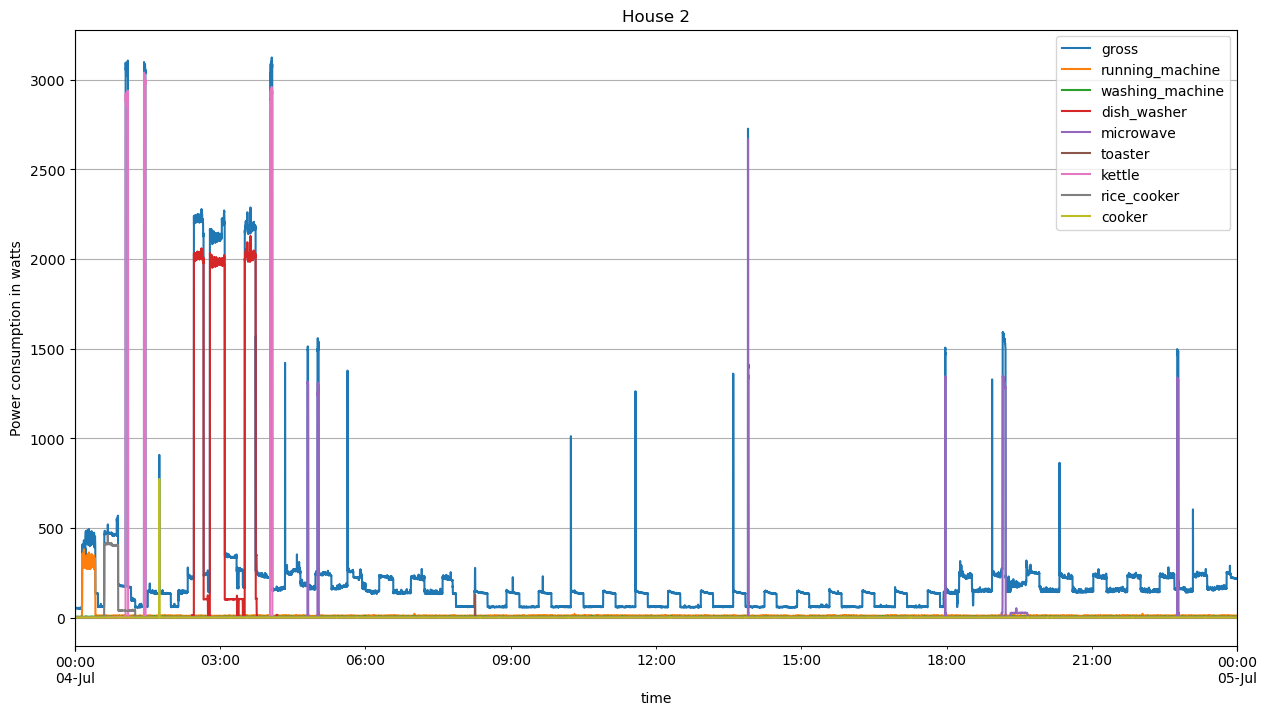

In [24]:
fig, ax = plt.subplots(1, 1, figsize=(15, 8))

# ax = sub_df[['gross', 'app_sum']].plot(ax=ax)
ax = sub_df[['gross', 'running_machine', 'washing_machine', 'dish_washer', 'microwave', 'toaster', 'kettle', 'rice_cooker', 
             'cooker']].plot(ax=ax)
ax.grid(True)
ax.set_title('House {}'.format(selected_hid))
ax.set_ylabel('Power consumption in watts')
plt.savefig('appliances.png')

In [25]:
df1['app_sum'] = df1[appliance_cols].sum(axis=1)
df1.describe()

,modem,cooker,rice_cooker,kettle,monitor,laptop,router,server_hdd,server,speakers,playstation,toaster,fridge,microwave,laptop2,running_machine,washing_machine,dish_washer,gross,app_sum
count,2.190874e+06,2.190874e+06,2.190874e+06,2.190874e+06,2.190874e+06,2.190874e+06,2.190874e+06,2.190874e+06,2.190874e+06,2.190874e+06,2.190874e+06,2.190874e+06,2.190874e+06,2.190874e+06,2.190874e+06,2.190874e+06,2.190874e+06,2.190874e+06,2.190874e+06,2.190874e+06
mean,9.007807e+00,8.243149e-02,2.285430e+00,1.948569e+01,2.382920e+01,9.923234e+00,1.090051e+01,6.757264e+00,1.892114e+01,5.272410e+00,9.545154e-01,3.029179e-01,2.753475e+01,3.228324e+00,9.861547e+00,5.654347e+00,6.841748e+00,1.953854e+01,1.803818e+02,5.741943e+01
std,4.041468e-01,3.315511e+00,2.234742e+01,2.331883e+02,2.983719e+01,1.387879e+01,7.181569e+00,5.553314e+00,9.965478e+00,3.980429e+00,7.362714e-01,1.285732e+01,3.567633e+01,6.326169e+01,1.241547e+01,1.538122e+01,8.242392e+01,1.896413e+02,3.336591e+02,3.253720e+02
min,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,2.000000e+00,0.000000e+00,0.000000e+00,7.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,4.400000e+01,2.000000e+00
25%,9.000000e+00,0.000000e+00,1.000000e+00,1.000000e+00,0.000000e+00,0.000000e+00,6.000000e+00,1.000000e+00,1.300000e+01,3.000000e+00,1.000000e+00,0.000000e+00,1.100000e+01,0.000000e+00,0.000000e+00,1.000000e+00,3.000000e+00,1.000000e+00,7.200000e+01,7.000000e+00
50%,9.000000e+00,0.000000e+00,1.000000e+00,1.000000e+00,0.000000e+00,0.000000e+00,6.000000e+00,1.100000e+01,1.400000e+01,3.000000e+00,1.000000e+00,0.000000e+00,1.100000e+01,0.000000e+00,0.000000e+00,1.000000e+00,3.000000e+00,1.000000e+00,1.360000e+02,9.000000e+00
75%,9.000000e+00,0.000000e+00,1.000000e+00,1.000000e+00,6.100000e+01,1.600000e+01,1.900000e+01,1.200000e+01,2.600000e+01,1.000000e+01,1.000000e+00,0.000000e+00,1.100000e+01,0.000000e+00,2.500000e+01,1.000000e+01,3.000000e+00,1.000000e+00,1.750000e+02,1.600000e+01
max,1.370000e+02,3.532000e+03,1.017000e+03,3.996000e+03,1.300000e+03,2.100000e+03,2.220000e+02,1.917000e+03,4.790000e+02,2.051000e+03,3.110000e+02,2.364000e+03,1.820000e+03,2.668000e+03,7.220000e+02,7.180000e+02,2.974000e+03,3.964000e+03,6.237000e+03,6.082000e+03


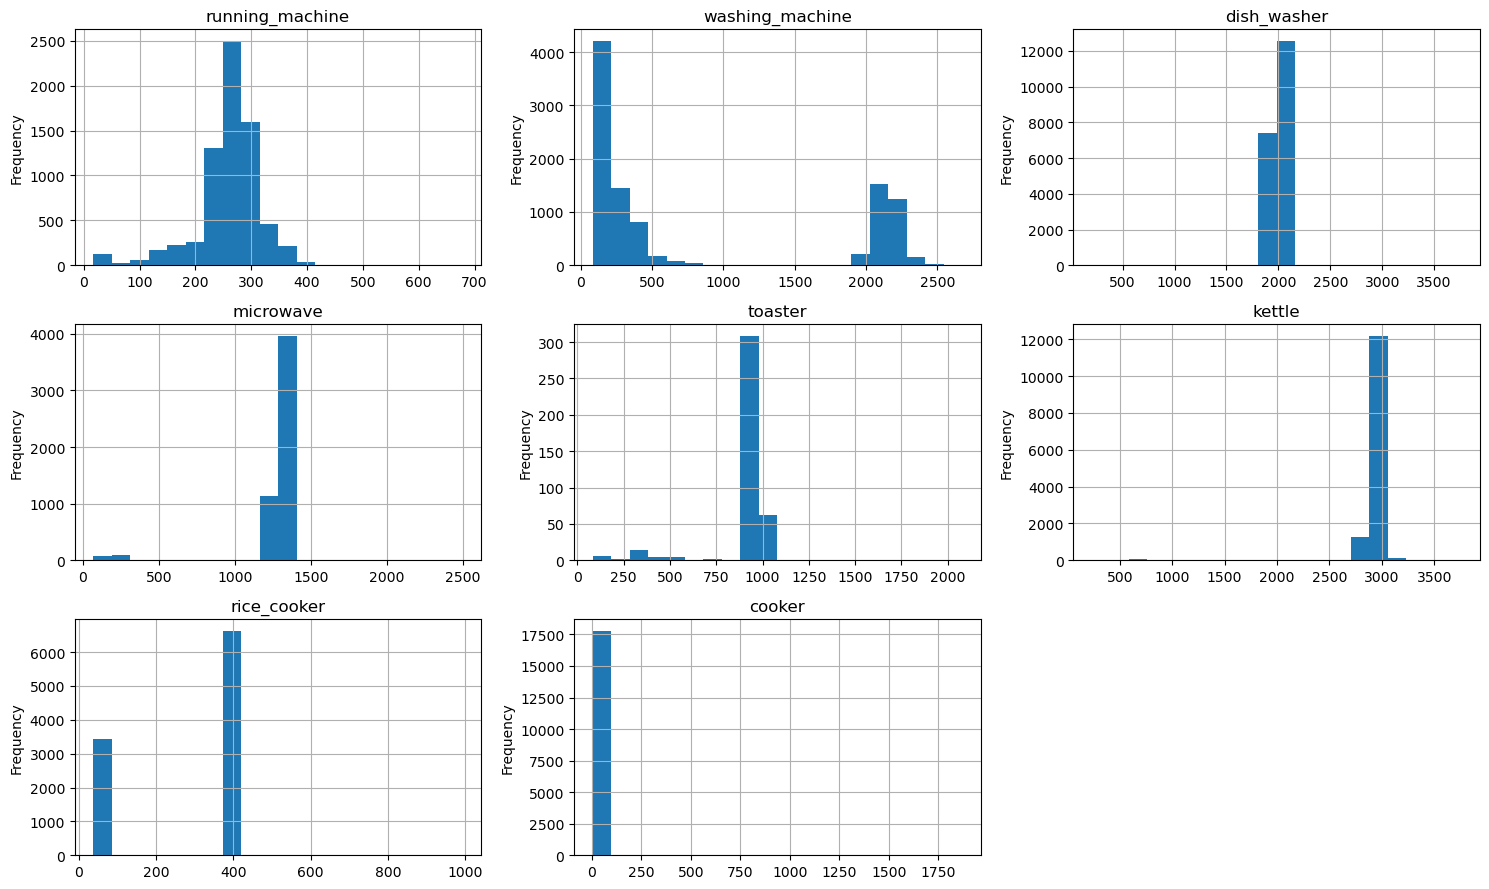

In [26]:
nrow = int(np.ceil(np.sqrt(len(appliance_cols))))
ncol = int(np.ceil(1.0 * len(appliance_cols) / nrow))

fig, axes = plt.subplots(nrow, ncol, figsize=(5*ncol, 3*nrow))
axes[-1, -1].axis('off')

for i, app in enumerate(appliance_cols):
  row_ix = i // 3
  col_ix = i % 3
  ax = axes[row_ix][col_ix]
  lb = df1[app].std()
  ub = df1[app].max() - lb
  df1[app + '_on'] = df1[app].apply(
      lambda x: 1 if x > lb else 0)
  df1[app][(df1[app] > lb) & (df1[app] < ub)].plot.hist(bins=20, ax=ax)
  ax.set_title(app)
  ax.grid(True)

plt.tight_layout()

In [27]:
df1.mean(axis=0)

modem                   9.007807
cooker                  0.082431
rice_cooker             2.285430
kettle                 19.485692
monitor                23.829198
laptop                  9.923234
router                 10.900508
server_hdd              6.757264
server                 18.921137
speakers                5.272410
playstation             0.954515
toaster                 0.302918
fridge                 27.534750
microwave               3.228324
laptop2                 9.861547
running_machine         5.654347
washing_machine         6.841748
dish_washer            19.538537
gross                 180.381797
app_sum                57.419426
running_machine_on      0.003192
washing_machine_on      0.004544
dish_washer_on          0.009152
microwave_on            0.002430
toaster_on              0.000186
kettle_on               0.006325
rice_cooker_on          0.004621
cooker_on               0.008135
dtype: float64

In [28]:
train_st = '2013-03-01 00:00:00'
train_et = '2013-05-31 23:59:59'
train_data = df1.loc[train_st:train_et]
print(train_data.shape)

valid_st = '2013-06-01 00:00:00'
valid_et = '2013-06-30 23:59:59'
valid_data = df1.loc[valid_st:valid_et]
print(valid_data.shape)

test_st = '2013-07-01 00:00:00'
test_et = '2013-07-31 23:59:59'
test_data = df1.loc[test_st:test_et]
print(test_data.shape)

(1324800, 28)
(432000, 28)
(434074, 28)


In [29]:
train_data.to_csv('train.csv')
valid_data.to_csv('valid.csv')
test_data.to_csv('test.csv')

In [30]:
train_data = pd.read_csv('train.csv', index_col=0)
print(pd.Series(train_data.columns))
train_data.head()

0                  modem
1                 cooker
2            rice_cooker
3                 kettle
4                monitor
5                 laptop
6                 router
7             server_hdd
8                 server
9               speakers
10           playstation
11               toaster
12                fridge
13             microwave
14               laptop2
15       running_machine
16       washing_machine
17           dish_washer
18                 gross
19               app_sum
20    running_machine_on
21    washing_machine_on
22        dish_washer_on
23          microwave_on
24            toaster_on
25             kettle_on
26        rice_cooker_on
27             cooker_on
dtype: object


,modem,cooker,rice_cooker,kettle,monitor,laptop,router,server_hdd,server,speakers,...,gross,app_sum,running_machine_on,washing_machine_on,dish_washer_on,microwave_on,toaster_on,kettle_on,rice_cooker_on,cooker_on
time,,,,,,,,,,,,,,,,,,,,,
2013-03-01 00:00:05,9,0,1,1,0,0,19,12,22,3,...,118,16,0,0,0,0,0,0,0,0
2013-03-01 00:00:11,9,0,1,1,0,0,20,12,22,3,...,119,16,0,0,0,0,0,0,0,0
2013-03-01 00:00:17,9,0,1,1,0,0,18,12,22,3,...,117,16,0,0,0,0,0,0,0,0
2013-03-01 00:00:23,9,0,1,1,0,0,18,12,22,3,...,117,16,0,0,0,0,0,0,0,0
2013-03-01 00:00:29,9,0,1,1,0,0,19,12,22,3,...,118,16,0,0,0,0,0,0,0,0


In [31]:
appliance_cols = [x for x in train_data.columns if '_on' in x]
print(train_data[appliance_cols].mean())

running_machine_on    0.003465
washing_machine_on    0.000996
dish_washer_on        0.002772
microwave_on          0.000750
toaster_on            0.000094
kettle_on             0.005762
rice_cooker_on        0.002776
cooker_on             0.001227
dtype: float64


In [32]:
test_data = pd.read_csv('test.csv', index_col=0)
print(test_data.shape)
print(test_data[appliance_cols].mean())

(434074, 28)
running_machine_on    0.003437
washing_machine_on    0.009632
dish_washer_on        0.017790
microwave_on          0.004872
toaster_on            0.000263
kettle_on             0.006563
rice_cooker_on        0.010072
cooker_on             0.019743
dtype: float64


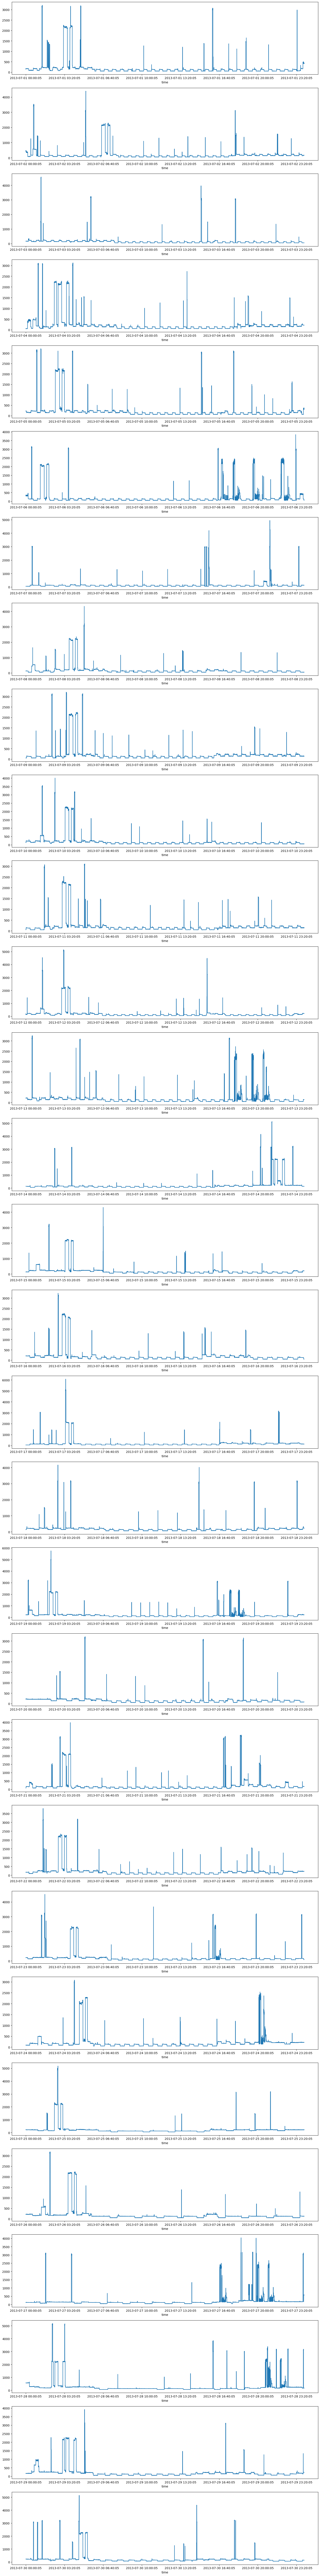

In [33]:
# ss = ['2013-09-{0:02d} 00:00:00'.format(i+1) for i in range(30)]
# ee = ['2013-09-{0:02d} 23:59:59'.format(i+1) for i in range(30)]
ss = ['2013-07-{0:02d} 00:00:00'.format(i+1) for i in range(30)]
ee = ['2013-07-{0:02d} 23:59:59'.format(i+1) for i in range(30)]

fig, axes = plt.subplots(30, 1, figsize=(15, 120))
for i, (s, e) in enumerate(zip(ss, ee)):
  test_data.loc[s:e].gross.plot(ax=axes[i])
  axes[i].set
plt.tight_layout()